In [1]:
!pip3 install matplotlib
!pip3 install seaborn

# visualization with python libraries

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = '' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [4]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

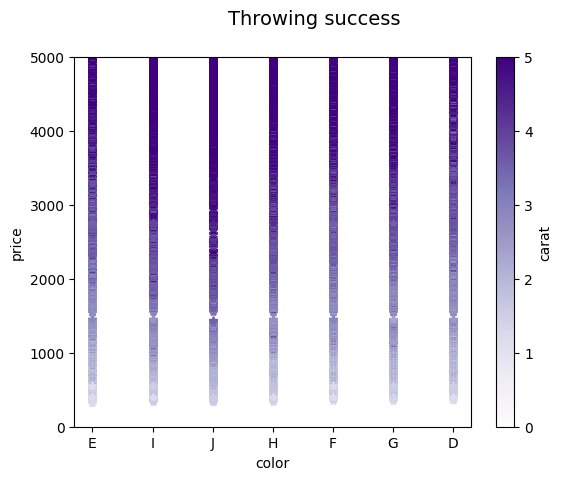

In [5]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [6]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

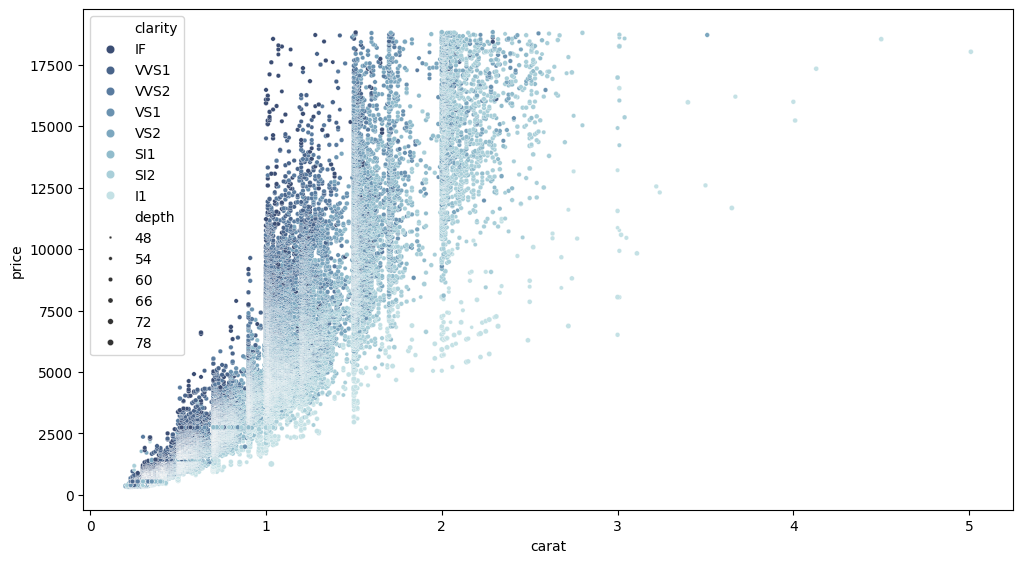

In [7]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

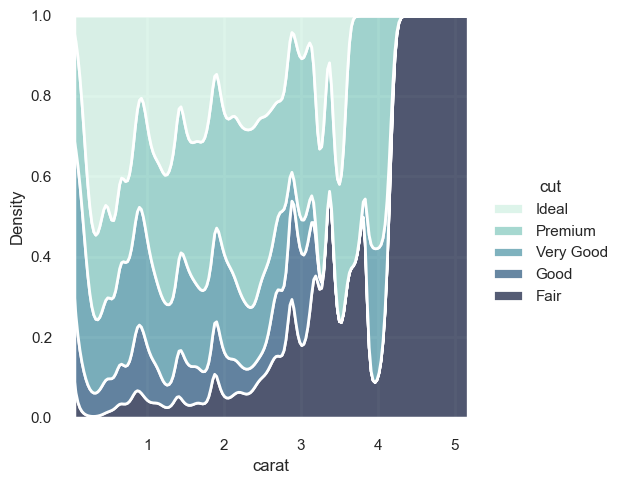

In [8]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

* 1번 시각화에서는 colorbar를 이용하여 그래프에 x축을 color로, y축을 price로뿐만 아니라 각 점에 색깔을 부여하여 carat정보까지 보여준다. 그래프를 통해 높은 carat는 높은 price를 갖는다는 것을 알 수 있다. 그 이유는 점점 위로 올라갈 수록 색이 짙어지기 때문이다. carat이 0과 5사이로 normalize가 되어 있어 정확한 carat 값을 알 수가 없다는 문제점이 있다. 때문에 개선점으로는 mappable parameter를 수정하는 것이 될 것이다. 또한, colorbar의 title 역시 정확하지 않다. 'Throwing Success'라는 제목 대신 'The relationship between price and carat for each colors'와 같은 제목을 쓰는 것이 될 것이다.

* 2번 시각화에서는 scatterplot를 이용하여 그래프에 x축을 carat으로, y축을 price로뿐만 아니라 각 점에서 색깔 및 크기를 부여하여 clarity와 depth정보까지 한 번에 보여준다. 색깔을 통해 확실히 clarity가 높으면 높을수록 price가 증가함을 눈으로 알 수 있다. 하지만 depth와 price의 관계는 시각적으로 구분하기 어렵다. 그 이유는 그래프의 점이 많다보니 여러 점이 겹쳐있어 점 크기를 시각적으로 구분하기 어렵기 때문이다. 때문에, 개선점으로는 첫 번째, depth의 정보를 시각적으로 잘 표현하는 것이다. 크기가 아닌 다른 지표로 depth를 표현할 수도 있을 것이며 다른 방법으로는 애초에 다른 그래프를 만들어 그 그래프에는 clarity가 아닌 depth정보만을 입력하는 방법이 되겠다. 두 번째 개선점으로는 제목을 짓는 것이다. 그래프를 통해 그래프를 만든 사람의 의도를 파악할 수는 있었지만 이 그래프가 명확하게 설명하고자 하는 것이 무엇인지 그리고 이 그래프를 가지고 어떤 것을 분석하는 것에 활용할 것인지에 대한 설명이 없다. 

* 3번 시각화에서는 carat에 따른 cut의 분포를 시각적으로 displot를 통해 보여준다. 이 시각화를 통해 알 수 있는 것은 캐럿이 약 4.2 이상일 때 cut이 거의 모두 Fair이라는 것이다. 개선점으로는 제목을 추가하는 것이 될 것이다. 

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* 과제 2번에서 2번 시각화를 개선하였습니다. 첫 번째, 개선점으로는 그래프를 2개 그린 것입니다. price와 clarity의 관계를 표현하는 것을 첫 번째 그래프로 표현하였습니다. price와 depth의 관계를 표현하는 것을 두 번째 그래프로 표현하려고 하였으나, 관계 확인이 어려워 다른 지표인 cut를 사용하였습니다. 두 번째 그래프에서 볼 수 있듯이 Ideal cut을 갖는 다이아몬드는 대부분 61~62 사이에 존재함을 알 수 있으며 이 구간을 중심으로 멀어지면 멀어질수록 Fair로 가까워짐을 색깔을 통해 시각적으로 알 수 있다. 두 번째 개선점으로는 제목을 추가하였다는 것이다. 기존 2번 시각화에서는 그래프의 제목이 존재하지 않아 이 그래프가 나타내고자 하는 것을 명확히 알 수 없었다. 그러나, 개선점으로 제목을 추가함으로써 이를 알 수 있게끔 하였다.

Text(0.5, 1.0, 'Relationship between depth and cut')

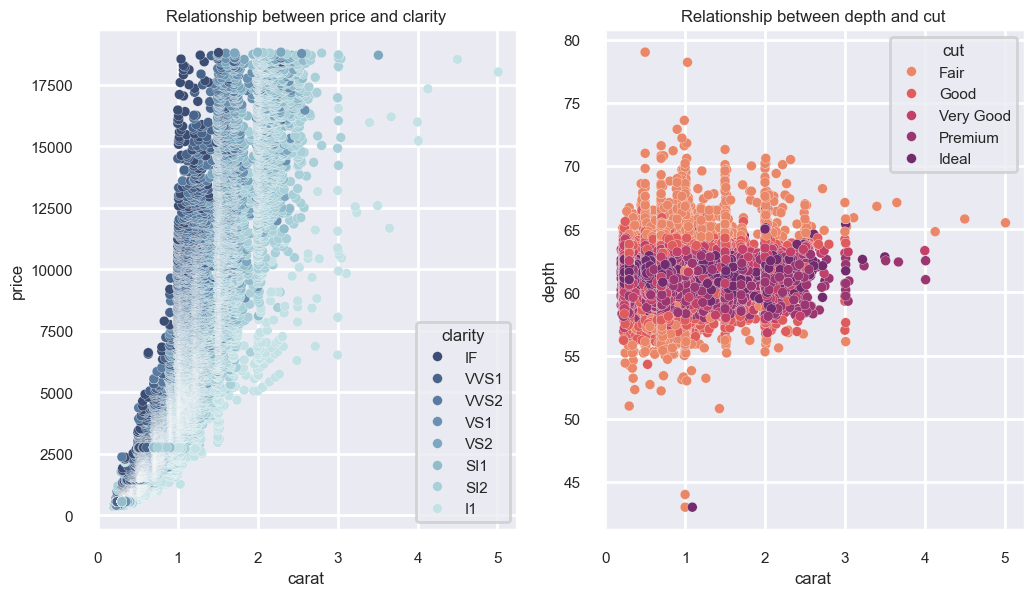

In [9]:
# 여기에 공통과제 2번 코드를 작성해주세요. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주시면 더 좋습니다!
f, ax = plt.subplots(1, 2, figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

# 점 크기는 50으로 적당히 조정. 크기 설정 없으면 점 크기가 너무 커 보기가 불편함.
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                s=50,
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax[0])

# Add title
ax[0].set_title('Relationship between price and clarity')

# cut은 numeric이 아닌 categorical하기 때문에 위의 clariety_ranking과 유사하게 cut_ranking을 만듦
cut_ranking = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# 점 크기는 50으로 적당히 조정. 크기 설정 없으면 점 크기가 너무 커 보기가 불편함.
sns.scatterplot(x="carat",
                y="depth",
                hue="cut",
                s=50,
                palette="flare",
                hue_order=cut_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax[1])

# Add title
ax[1].set_title('Relationship between depth and cut')

# 시각화 공통과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 제가 답하고자 하는 질문은 California에서 어떤 커피가 가장 큰 수익을 내는지입니다. 가설도 세워 시각화를 통해 가설 검증까지 하려 했으나 커피와 관련한 지식이 없어 가설을 내릴 수 없었다. 첫 번째로 고려해야 하는 것은 State가 California여야 한다는 것이다. 때문에 ```df = df[df['State'] == 'California']```로 필터링 작업을 거쳤다. 독립변수 (independent variable)은 Product이며 종속변수는 (dependent variable)은 Profit이다. 종속변수는 categorical이 아닌 numerical이고 수익의 통계를 알기 위해 boxplot을 이용하여 Q1, Average, Q3에 대한 정보를 시각적으로 보여줄 것이다. 완료된 시각화는 아래 그림을 통해 알 수 있다. boxplot은 outlier까지 동그라미로 표시해주는데 크기(fliersize)를 5로 낮춰 보기 편하게 세팅해주었다. 시각화를 통해 우리는 Colombian 커피가 가장 많은 수익을 낸다는 결론을 도출할 수 있다. 시각화를 통해 추가적으로 답할 수 있는 것은 Decafe Irish Cream과 Amaretto는 적자를 낸다는 것이다. 이 시각화를 통해 어떤 커피가 California 가장 큰 수익을 내는지를 확인해보았는데 추가적으로 해보고 싶은 분석으로는 가장 큰 수익을 내는 커피가 State의 지리적, 경제적 특징과 얼만큼 관련이 있는지이다. 예를 들어, California에 Colombian이 인기가 가장 많다거나 아니면 Colmbian이 많이 들어와 그만큼 많은 사람들이 찾는다거나 일것이다. 이를 위해서는 지리적, 경제적 특징을 표현할 수 있는 지표들을 수치화하거나 카테고리화하여 이를 가장 큰 수익을 내는 커피와 비교해보는 것이 될 것이다. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Green Tea'),
  Text(1, 0, 'Earl Grey'),
  Text(2, 0, 'Mint'),
  Text(3, 0, 'Decaf Irish Cream'),
  Text(4, 0, 'Decaf Espresso'),
  Text(5, 0, 'Amaretto'),
  Text(6, 0, 'Colombian'),
  Text(7, 0, 'Caffe Latte'),
  Text(8, 0, 'Caffe Mocha'),
  Text(9, 0, 'Chamomile'),
  Text(10, 0, 'Lemon'),
  Text(11, 0, 'Darjeeling')])

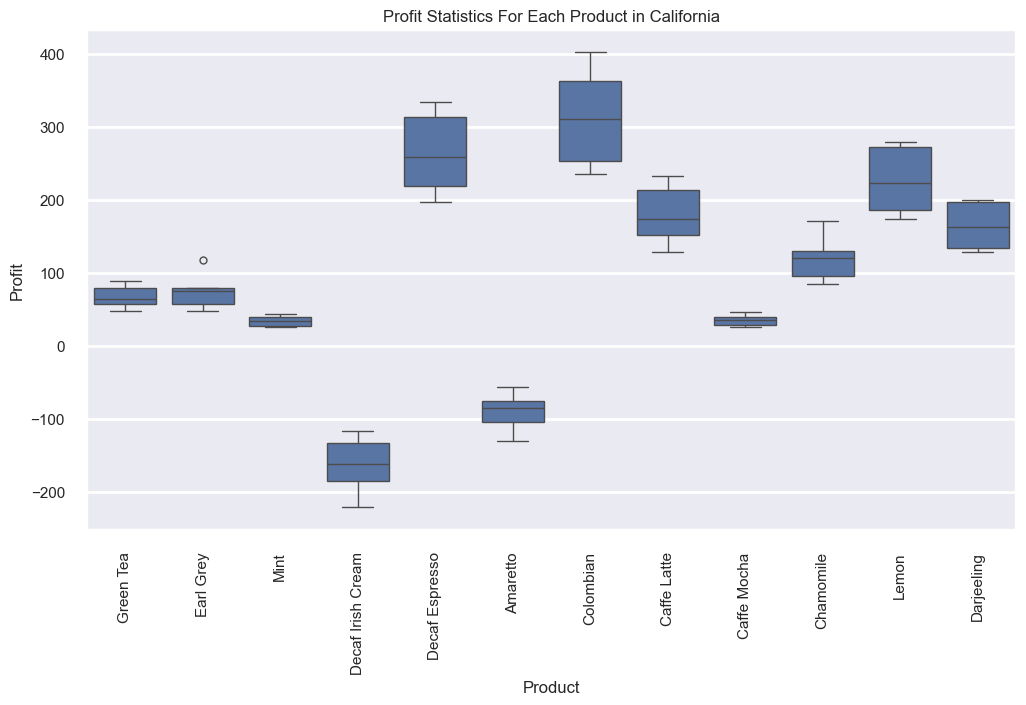

In [29]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Coffee_Chain_Sales.csv')
df = df[df['State'] == 'California']

f, ax = plt.subplots(figsize=(12, 6.5))
sns.boxplot(x='Product', y='Profit', fliersize = 5, data=df)
ax.set_title('Profit Statistics For Each Product in California')
plt.xticks(rotation = 90)